In [2]:
%matplotlib inline

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

In [3]:
con = sqlite3.connect('database.sqlite')

pd.read_sql_query("SELECT * FROM Reviews LIMIT 5", con)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
#Fetching all records
food_reviews = pd.read_sql_query("""
SELECT 
  Score, 
  Summary, 
  HelpfulnessNumerator as VotesHelpful, 
  HelpfulnessDenominator as VotesTotal
FROM Reviews """, con)

In [5]:
#Records without considering rating 3 = 525814
#Total Records - 568454

In [6]:
food_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 4 columns):
Score           568454 non-null int64
Summary         568454 non-null object
VotesHelpful    568454 non-null int64
VotesTotal      568454 non-null int64
dtypes: int64(3), object(1)
memory usage: 17.3+ MB


In [7]:
food_reviews.head(5)

,Score,Summary,VotesHelpful,VotesTotal
0,5,Good Quality Dog Food,1,1
1,1,Not as Advertised,0,0
2,4,"""Delight"" says it all",1,1
3,2,Cough Medicine,3,3
4,5,Great taffy,0,0


In [8]:
food_reviews.drop_duplicates(inplace=True)
food_reviews.shape

(337446, 4)

In [9]:
food_reviews.head(5)

,Score,Summary,VotesHelpful,VotesTotal
0,5,Good Quality Dog Food,1,1
1,1,Not as Advertised,0,0
2,4,"""Delight"" says it all",1,1
3,2,Cough Medicine,3,3
4,5,Great taffy,0,0


In [10]:
food_reviews.tail(20)

,Score,Summary,VotesHelpful,VotesTotal
568427,5,The search has ended!,1,1
568429,5,Violet French Hard Candy,1,1
568431,1,Mostly water,0,0
568432,1,No Good,0,0
568435,2,Where's the tortellini?,0,2
568436,5,Baker's Ammonia Small quantity,10,10
568437,5,Good buy.,4,4
568438,5,Baking Ammonia that Works,3,3
568439,4,a-ok,0,5
568440,5,"Delicious, all natural and allergy free treats!",1,1


In [11]:
# checking summary with ? and !
food_reviews[food_reviews.Summary.str.contains("!")]

,Score,Summary,VotesHelpful,VotesTotal
6,5,Great! Just as good as the expensive brands!,0,0
13,4,fresh and greasy!,2,2
17,5,Love it!,0,0
18,5,GREAT SWEET CANDY!,0,0
22,5,Delicious product!,0,0
...,...,...,...,...
568385,1,Rip-off: Be careful before u buy!!!!!!!,1,1
568420,4,Co-co-yummy!,0,0
568427,5,The search has ended!,1,1
568440,5,"Delicious, all natural and allergy free treats!",1,1


In [12]:
food_reviews[food_reviews.Summary.str.contains("!")]

,Score,Summary,VotesHelpful,VotesTotal
6,5,Great! Just as good as the expensive brands!,0,0
13,4,fresh and greasy!,2,2
17,5,Love it!,0,0
18,5,GREAT SWEET CANDY!,0,0
22,5,Delicious product!,0,0
...,...,...,...,...
568385,1,Rip-off: Be careful before u buy!!!!!!!,1,1
568420,4,Co-co-yummy!,0,0
568427,5,The search has ended!,1,1
568440,5,"Delicious, all natural and allergy free treats!",1,1


In [13]:
food_reviews[food_reviews.VotesHelpful == food_reviews.VotesTotal]

,Score,Summary,VotesHelpful,VotesTotal
0,5,Good Quality Dog Food,1,1
1,1,Not as Advertised,0,0
2,4,"""Delight"" says it all",1,1
3,2,Cough Medicine,3,3
4,5,Great taffy,0,0
...,...,...,...,...
568447,5,"If its all natural, this is like panacea of Sp...",0,0
568448,5,Very large ground spice jars.,0,0
568449,5,Will not do without,0,0
568451,5,Perfect for our maltipoo,2,2


In [14]:
n = len(food_reviews[food_reviews.VotesHelpful == food_reviews.VotesTotal])/len(food_reviews)
print("Percent of records having same number of VotesHelpful and VotesTotal: ",n)

Percent of records having same number of VotesHelpful and VotesTotal:  0.7759997155100372


In [15]:
food_reviews[food_reviews.VotesHelpful != food_reviews.VotesTotal]

,Score,Summary,VotesHelpful,VotesTotal
14,5,Strawberry Twizzlers - Yummy,4,5
15,5,"Lots of twizzlers, just what you expect.",4,5
26,1,Nasty No flavor,0,1
27,4,Great Bargain for the Price,0,1
31,5,THIS IS MY TASTE...,0,1
...,...,...,...,...
568384,2,Bland Taco Seasoning,0,3
568405,5,Arrived Fine,3,5
568417,4,Great,2,4
568435,2,Where's the tortellini?,0,2


In [16]:
food_reviews.VotesTotal.value_counts()

0      145215
1       67820
2       38973
3       22810
4       15390
        ...  
305         1
158         1
562         1
923         1
251         1
Name: VotesTotal, Length: 234, dtype: int64

In [17]:
food_reviews.VotesHelpful.value_counts()

0      166618
1       70279
2       34618
3       19540
4       11938
        ...  
149         1
147         1
146         1
145         1
253         1
Name: VotesHelpful, Length: 231, dtype: int64

In [18]:
#pd.set_option('display.max_rows', None, 'display.max_columns', None)
food_reviews[food_reviews.VotesHelpful > 100]

,Score,Summary,VotesHelpful,VotesTotal
1702,5,Yum!,165,168
3305,3,Why can't anyone make a hot cocoa without sucr...,187,216
4251,5,great,112,112
4252,5,Best Tasting that we've ever had: Gluten-Free ...,107,108
9904,5,Lowers Blood sugars,128,130
...,...,...,...,...
544838,5,"Very authentic and spicy, tastes great with so...",107,109
549057,1,"AMAZING, but MAKE YOUR OWN (Steps below).",227,251
552316,1,New Recipie: Less servings More Sugar Not reco...,188,195
552368,5,WOW...never thought I'd find these!,106,113


In [19]:
food_reviews_highest_votes = food_reviews[food_reviews.VotesTotal >100]
food_reviews_highest_votes.shape

(231, 4)

In [20]:
import seaborn as sns

C:\Users\PB5062657\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\PB5062657\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


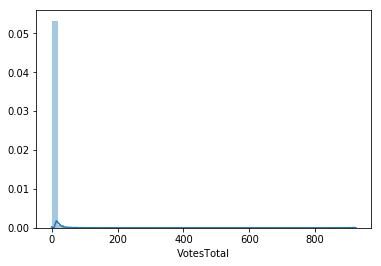

In [21]:
sns.distplot(food_reviews.VotesTotal)

In [22]:
## Feature Engineering

In [23]:
#food_reviews['Sentiment'] = food_reviews['Score'].apply(lambda score: "positive" if score > 3 elif score == 3 "neutral" else "negative")
#food_reviews['Usefulness'] = (food_reviews['VotesHelpful']/food_reviews['VotesTotal']).apply(lambda n: "useful" if n > 0.5 else "useless")

SyntaxError: invalid syntax (<ipython-input-23-9601a9b780df>, line 1)

## Preprocessing Text

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
import re
import string
import nltk

def remove_special_characters(summary):
    summary = re.sub(r'[_"\-%()|+&=*%:$@\[\]/]', ' ', summary) #,.!;?

In [ ]:
string.punctuation